# <div dir=RTL><u> תרגיל מס 2 ב- SymPy </u></div>

In [1]:
Names=['שמי','שותפי']

In [2]:
import sympy as sp
sp.init_printing()
import matplotlib.pyplot as plt

## <div dir=RTL><u> שאלה 1</u></div>
<div dir=RTL>  בעזרת הנוסחא $\frac{g\cdot t^2}{2}$ אפשר לחשב  את המרחק שגוף נופל עובר.     "גוף נופל" הוא גוף המשוחרר ממנוחה. אבן הנופלת מגג בניין חולפת על פני חלון באורך $l$
במשך $\Delta t$. מה מרחק הקצה העליון של החלון מהגג? פתרו בעזרת SymPy בלבד.
</div>


In [3]:
sp.var('l g h t dt')
eq1 = sp.Eq(h,sp.Rational(1, 2) * g * t ** 2)
eq2 = sp.Eq(h + l, sp.Rational(1, 2) * g * (t + dt) ** 2)
eq1, eq2

In [4]:
sp.solve([eq1,eq2],[h ,t])

## <div dir=RTL><u>שאלה 2</u></div>
<div dir=RTL>
נתון כי בשאלה הקודמת $\Delta t=0.2s $ ו- $l=2 m$. חשבו את מרחק הקצה העליון של החלון מהגג.</div>

In [5]:
_[0][0].subs([(dt, 0.2), (l, 2), (g, 9.8)]).evalf(3)

## <div dir=RTL> <u> שאלה 3 </u></div>
<div dir=RTL>	מהירות שחיין במים עומדים היא c. השחיין שוחה מרחק d במורד נהר וחוזר במעלה הנהר. מהירות זרימת המים בנהר v. פתחו ב-Sympy ביטוי למשך הזמן הדרוש לשחיין לבצע את הדרך הלוך ושוב.</div>

In [6]:
sp.var('t_up t_d d c v')


In [7]:
t_u = d / (v - c)
t_d = d /(v + c)
t_tot = t_u + t_d
t_tot

## <div dir=RTL><u>שאלה 4</u></div>
<div dir=RTL>	רוחב הנהר בשאלה הקודמת הוא d. פתחו ביטוי לכיוון שבו על  השחיין לשחות כדי להתקדם בכיוון הניצב לגדת הנהר.</div>

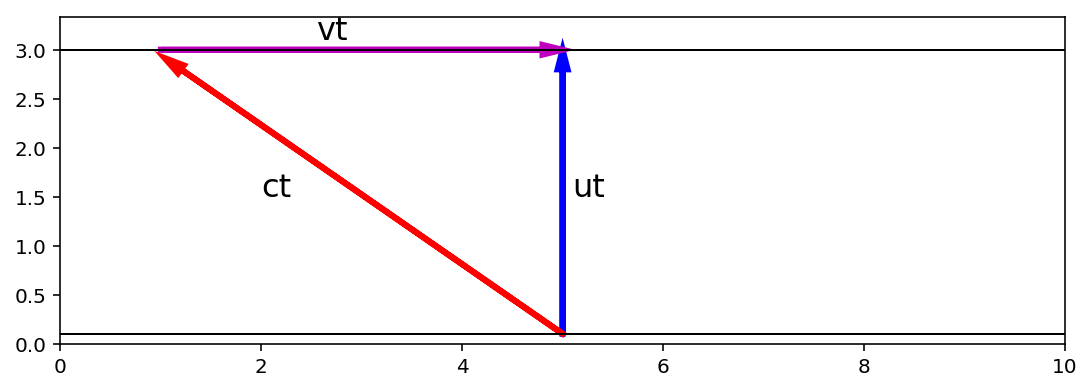

In [8]:
fig = plt.figure(figsize = (9,3))
plt.xlim(0,10)
plt.ylim(0,3.33)
plt.plot((0,10),(0.1,0.1),color = 'k', lw = 1)
plt.plot((0,10),(3, 3),color = 'k', lw = 1)
plt.arrow(5, 0.1, 0, 2.7, head_width = 0.1, head_length = 0.2,lw = 3, fc= 'b', ec = 'b')
plt.arrow(1, 3, 3.8, 0, head_width = 0.1, head_length = 0.2, lw = 3, fc= 'm', ec = 'm')
plt.arrow(5, 0.1, -3.8, 2.7, head_width = 0.1, head_length = 0.2, lw = 3, fc= 'r', ec = 'r')
plt.text(2.55,3.1,'vt',fontsize = 16)
plt.text(5.1,1.5,'ut', fontsize = 16)
plt.text(2,1.5,'ct', fontsize = 16)

In [9]:
alpha = sp.asin(v/c)

## <div dir=RTL><u> שאלה 5</u></div>
<div dir=RTL> 
עבור שאלות 3 ו- 4 חשבו את היחס בין הזמן הדרוש לשחיין לשחות מרחק d במורד הנהר ולחזור לבין הזמן הדרוש לו לחצות את הנהר הלוך ושוב. </div>

In [10]:
((d / (c + v) + d / (c - v)) / ( 2 * d / sp.sqrt(-v ** 2 + c ** 2))).simplify()

## <div dir=RTL><u> שאלה 6</u></div>
<div dir=RTL> נתון בניין בגובה H. מתחתית הבניין זורקים מעלה אבן במהירות v0. מצאו גבול תחתון למהירות הדרושה כדי שהאבן תגיע לראש הבניין. נניח כי מקנים לגוף מהירות גדולה יותר, פתחו ביטוי לזמנים בהם חולפת האבן על פני הבניין והפכו בעזרת הפונקציה lambdify  את הביטוי לפונקציה נומרית. 

In [11]:
sp.var('g H v0 t',positive = True)
eq1 = sp.Eq(H, v0 * t - sp.Rational(1, 2) * g * t ** 2 )
eq2 = sp.Eq(v0 - g * t, 0)
eq1,eq2

In [12]:
sp.solve([eq1, eq2],[v0, t])[0][0]

In [13]:
t = sp.solve(eq1,t)
t

In [14]:
Height = sp.lambdify((v0, H, g), t)

<div dir=RTL>  הראו שהפונקציה שקיבלתם עבור הזמן עובדת באמצעות מספר דוגמאות מתאימות


In [15]:
Height(50, 25, 9.8)

In [16]:
u

NameError: name 'u' is not defined

## <div dir=RTL> <u>שאלה 7</u></div>
<div dir=RTL>
 שרטטו גרף  באמצעותו ניתן להמחיש את השאלה הקודמת.</div>

In [0]:
def plot_H(v0, H, g = 9.8):
    tm = 2*v0/g
    dt = tm /51 
    t = 0
    y = lambda t: v0 * t -0.5 * g * t ** 2
    
    while t <=tm:
        plt.plot(t,y(t),'r.')
        t += dt
    plt.plot([0,tm],[H,H],  'b-', l)
    plt.text(tm/2,1.2*H,'H='+str(H),fontsize = 24)
    plt.xlabel('t(s)')
    plt.ylabel('H(m)')
    plt.title('H Vs t graph')
plot_H(30, 20)

## <div dir=RTL> <u> שאלה 8 </u> </div>
<div dir=RTL> נתון הפולינום $x^{3} - 6 x^{2} + 5 x + 12$ מצאו את כל השורשים שלו, פעם בעזרת הפונקציה solve ופעם באמצעות הפונקציה factor. </div>

In [0]:
sp.var('x',real = True)
p = x ** 3 - 6 * x ** 2 + 5 * x + 12
sp.solve(p,x)

In [0]:
p.factor()

## <div dir=RTL> <u> שאלה 9 </u> </div>
<div dir=RTL>
פונקציית מקום זמן של חלקיק ניתנת על ידי: $$ x(t)=A\cdot 2^{-\frac{t}{T}} $$ <br> כאשר T הוא קבוע הניתן בשניות ו-A ניתן במטרים. פתחו ביטוי למהירות ותאוצת החלקיק כתלות בזמן. כמו כן שרטטו גרפים דינאמיים של המקום, המהירות והתאוצה. שנו את A בתחום שבין 0.1 ל-5 ואת T בתחום שבין 0.1 ל- 2.</div>


In [0]:
sp.var('x A T t')
x = A * 2 ** (-t/T)
v = x.diff(t)
a = v.diff(t)
v , a

In [0]:
xt = sp.lambdify((t, A, T), x)
vt = sp.lambdify((t, A, T), v)
at = sp.lambdify((t, A, T), a)

In [0]:
A = 2.5
T = 0.5 
fig,(ax1, ax2, ax3) = plt.subplots(3,1)
dt = 0.1
t = [i * dt for i in range(10)]
xl = [ xt(tt, A, T) for tt in t]
vl = [ vt(tt, A, T) for tt in t]
al = [ at(tt, A, T) for tt in t]


ax1.plot(t, xl,'r-')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)')
ax1.set_title('x vs t')

ax2.plot(t, vl,'b-')
ax2.set_xlabel('t')
ax2.set_ylabel('v(t)')
ax2.set_title('v vs t')

ax3.plot(t, al,'g-')
ax3.set_xlabel('t')
ax3.set_ylabel('a(t)')
ax3.set_title('a vs t')

